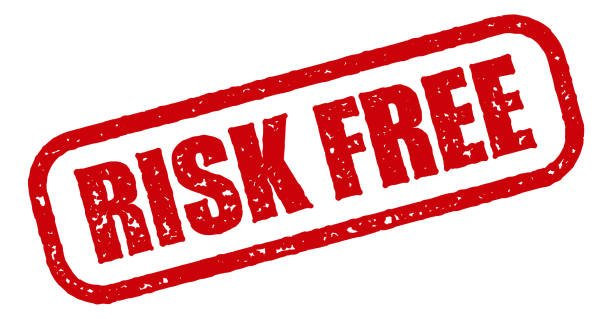
# Prediction of Risk in Companies 

## Data Set Information:

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. 

The information about the sectors and the counts of firms are listed respectively as:
* Irrigation (114)
* Public Health (77)
* Buildings and Roads (82)
* Forest (70)
* Corporate (47)
* Animal Husbandry (95)
* Communication (1)
* Electrical (4)
* Land (5)
* Science and Technology (3)
* Tourism (1)
* Fisheries (41)
* Industries (37)
* Agriculture (200).

**Source:** Nishtha Hooda, CSED, TIET, Patiala, https://archive.ics.uci.edu/ml/datasets/Audit+Data

# Loading of Dataset

In [151]:
%config Completer.use_jedi = False

In [346]:
# Initialization block
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
from sklearn import metrics 

In [153]:
Audit = pd.read_csv('Data set/audit.csv')

### Visualization of Dataset

In [154]:
Audit.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [155]:
Audit.describe(include="all")

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
unique,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,20.184536,NaN,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,NaN,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,NaN,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,NaN,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,NaN,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,NaN,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000


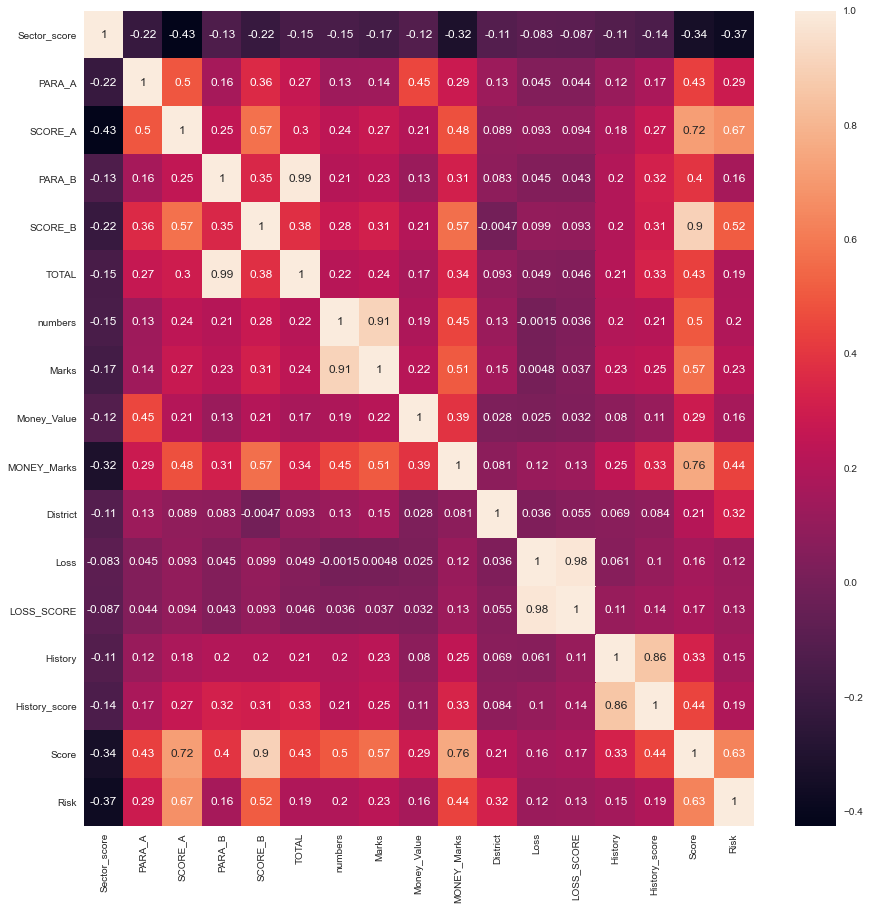

In [156]:
plt.subplots(figsize=(15,15))
sns.heatmap(Audit.corr(), annot=True)

In [157]:
Audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

### Data Cleaning

In [158]:
Audit['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [159]:
cols = Audit.LOCATION_ID.unique()

In [160]:
Audit.isnull().count()

Sector_score     776
LOCATION_ID      776
PARA_A           776
SCORE_A          776
PARA_B           776
SCORE_B          776
TOTAL            776
numbers          776
Marks            776
Money_Value      776
MONEY_Marks      776
District         776
Loss             776
LOSS_SCORE       776
History          776
History_score    776
Score            776
Risk             776
dtype: int64

In [161]:
# Audit.LOCATION_ID.astype(int)

In [162]:
for i in range(len(Audit)):
    if Audit.LOCATION_ID[i] == 'LOHARU' or Audit.LOCATION_ID[i] == 'NUH' or Audit.LOCATION_ID[i] == 'SAFIDON':
        print(i)
        

351
355
367


In [163]:
Audit.iloc[351:368,:]

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
351,1.99,LOHARU,0.30,2,0.0,2,0.30,5.0,2,0.00,2,2,0,2,0,2,2.0,0
352,1.99,31,0.76,2,0.0,2,0.76,5.0,2,7.48,4,2,0,2,0,2,2.2,1
353,1.99,4,0.96,2,0.0,2,0.96,5.0,2,9.45,4,2,0,2,0,2,2.2,1
354,1.99,14,1.26,4,0.0,2,1.26,5.0,2,0.00,2,2,0,2,0,2,2.2,1
355,1.99,NUH,0.55,2,0.0,2,0.55,5.0,2,0.67,2,2,0,2,0,2,2.0,0
356,1.99,5,0.29,2,0.0,2,0.29,5.0,2,0.06,2,2,0,2,0,2,2.0,0
357,1.99,5,1.27,4,0.0,2,1.27,5.0,2,2.77,2,2,0,2,0,2,2.2,1
358,1.99,5,1.34,4,0.0,2,1.34,5.0,2,0.00,2,2,0,2,0,2,2.2,1
359,1.99,5,0.56,2,0.0,2,0.56,5.0,2,1.75,2,2,0,2,0,2,2.0,0
360,1.99,20,0.86,2,0.0,2,0.86,5.0,2,0.00,2,6,0,2,0,2,2.4,1


In [164]:
cols # Looking at an ordered set some numbers are not in the set.
# such as 10, 3, 45

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [165]:
Audit.LOCATION_ID[351] = '10'
Audit.LOCATION_ID[355] = '3'
Audit.LOCATION_ID[367] = '45'

<ipython-input-165-85e1201a8538>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Audit.LOCATION_ID[351] = '10'
<ipython-input-165-85e1201a8538>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Audit.LOCATION_ID[355] = '3'
<ipython-input-165-85e1201a8538>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Audit.LOCATION_ID[367] = '45'


In [166]:
Audit.LOCATION_ID.unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', '10', '45', '43', '44', '17'],
      dtype=object)

In [167]:
Audit["LOCATION_ID"] = pd.to_numeric(Audit["LOCATION_ID"]) # Audit.iloc[:, 1].astype('category') # Audit.LOCATION_ID.astype(int)

In [168]:
Audit.describe(include='all')

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,14.873711,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,9.942001,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,8.000000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,13.000000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,19.000000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,45.000000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [169]:
Audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    int64  
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [170]:
Audit.Money_Value.unique()

array([3.3800e+00, 9.4000e-01, 0.0000e+00, 1.1750e+01, 2.9500e+00,
       4.4950e+01, 7.7900e+00, 7.3400e+00, 1.9300e+00, 4.4200e+00,
       9.6000e-01, 1.0430e+01, 7.0000e-03, 9.0000e+00, 4.1280e+01,
       1.4030e+01, 6.3180e+01, 3.4240e+01, 1.0000e-02, 2.0519e+02,
       1.0000e-01, 1.1160e+01, 1.2500e+00, 1.4600e+00, 6.7800e+00,
       1.1600e+00, 1.5241e+02, 1.0800e+00, 2.8400e+00, 9.0000e-01,
       9.6700e+00, 3.2680e+01, 9.3503e+02, 2.9630e+01, 1.1000e-01,
       2.6200e+00, 6.0000e-02, 2.4300e+00, 1.2613e+02, 2.0790e+01,
       1.5692e+02, 1.2290e+01, 2.2900e+00, 7.7800e+00, 2.5100e+00,
       8.3100e+00, 1.6000e-01, 4.7900e+01, 8.9100e+00, 4.9500e+00,
       1.7500e+00, 6.8000e-01, 1.5820e+01, 5.8000e-01, 2.1531e+02,
       5.0000e-02, 5.3340e+01, 1.0690e+01, 5.6900e+00, 1.3500e+00,
       1.1690e+01, 1.4600e+01, 2.0780e+01, 1.0222e+02, 7.4000e-01,
       8.7337e+02, 1.4000e+00, 4.2000e-01, 3.6520e+01, 6.0200e+00,
       1.7160e+01, 1.2910e+01, 1.0790e+01, 3.4600e+00, 2.3300e

In [171]:
Audit['Money_Value'] = Audit['Money_Value'].fillna(Audit['Money_Value'].mean())

In [172]:
Audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    int64  
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    776 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [173]:
Audit['Risk']

0      1
1      0
2      0
3      1
4      0
      ..
771    0
772    0
773    0
774    0
775    0
Name: Risk, Length: 776, dtype: int64

### Creating of Training and Validation set

In [174]:
y = Audit['Risk']
X = Audit.drop(['Risk'], axis=1)

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

### Classification using machine learning models

In [194]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=5, random_state=0, max_iter=100000).fit(X, y)

In [195]:
ypred = lr.predict(X_test)

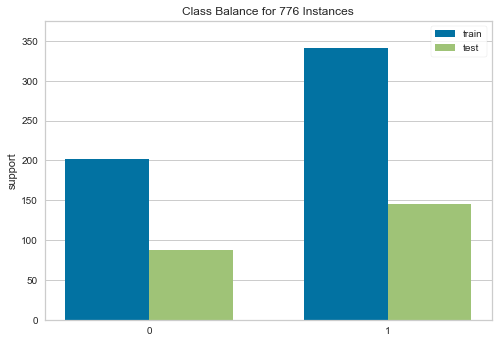

In [187]:
from yellowbrick.target import ClassBalance # good way to check the distribution of the classes in train and test
visualizer = ClassBalance(labels=[0, 1])
visualizer.fit(y_train, y_test); # only works with 1d arrays
visualizer.poof();

In [214]:
# Mean square error
metrics.mean_squared_error(y_test, ypred)

0.008583690987124463

In [215]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)

In [216]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [217]:
ypred = lr.predict(X_test)

In [218]:
metrics.accuracy_score(y_test, ypred)

0.9914163090128756

In [256]:
conf_mat =  metrics.confusion_matrix(y_test, ypred)

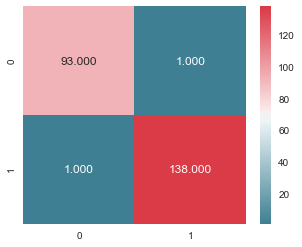

In [266]:
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat, cmap=sns.diverging_palette(220, 10, as_cmap = True), annot=True, fmt=".3f");

In [255]:
lr.predict(np.array(X_test.iloc[3,:]).reshape(1,-1)) # check the predictions

array([1], dtype=int64)

### Using PCA
Let us check it with a method where we can visualize the observations

In [267]:
from sklearn.decomposition import PCA

In [321]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [322]:
print(pca.explained_variance_ratio_)

[0.54234489 0.38798131]


In [323]:
print(pca.singular_values_)

[2081.38956462 1760.43907117]


In [326]:
principal_component = pca.fit_transform(X)

Here the PCA first components explains 54% of the observation, while the second component explains 38%. 
Only 8% of the information is lost!

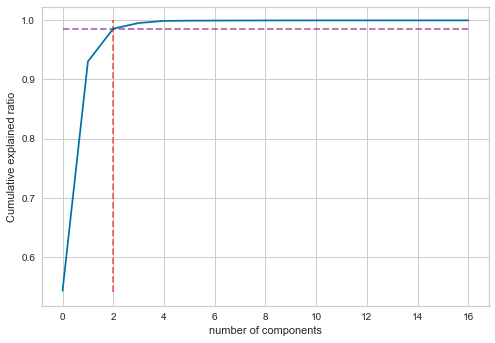

In [327]:
pca_empty = PCA().fit(X)
plt.plot(np.cumsum(pca_empty.explained_variance_ratio_))
plt.vlines(2, 0.54, 1, colors='red', alpha=0.6, linestyles = 'dashed') # for a 2 component analysis
plt.hlines(0.985, 0, 16, colors='purple', alpha=0.6, linestyles = 'dashed') # for a 2 component analysis
plt.xlabel('number of components')
plt.ylabel('Cumulative explained ratio');

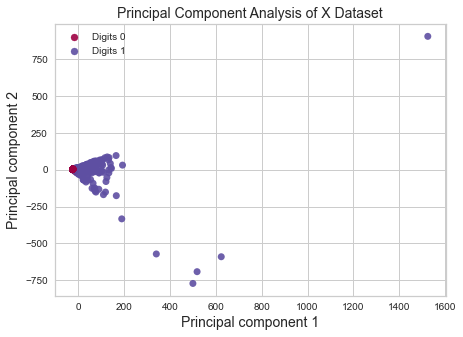

In [328]:
fig, ax = plt.subplots(figsize=(7,5))
classes = ['Digits 0', 'Digits 1']
_ = ax.set_title("Principal Component Analysis of X Dataset",fontsize=14)
scatter = ax.scatter(principal_component[:, 0], principal_component[:, 1], c = y, edgecolor='none', alpha=0.9, cmap=plt.cm.get_cmap('Spectral', 2), label='new')

_ = ax.set_xlabel('Principal component 1', fontsize= 14)
_ = ax.set_ylabel('Principal component 2', fontsize= 14) # we can see that the points are almost clearly demarcated from each other. 
_ = ax.legend(handles=scatter.legend_elements()[0], labels=classes);

### Using KNN

In [347]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [348]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [349]:
KNN.score(X_train, y_train)

0.9705340699815838

In [350]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(KNN, X_train, y_train, cv=5)

In [351]:
cv.mean()

0.9299864084267753